# Import necessary libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
from models import Tag
from datetime import datetime
from sqlalchemy import func


In [33]:
from models import Currency, CurrenciesHistory, Session


Session = Session()

# آمار توصیفی


# Part 1

## Cryptocurrency Market Cap vs. Volume 24h Scatter Plot

This Python code generates a scatter plot to explore the relationship between cryptocurrency market value (Market Cap) and daily trading volume (Volume 24h). The code retrieves data from a database, organizes it, and creates a scatter plot using Matplotlib. Each data point on the plot represents a cryptocurrency, with Market Cap on the x-axis and Volume 24h on the y-axis. The resulting visualization helps analyze how different cryptocurrencies compare in terms of market value and trading activity.



In [34]:
# Fetch the currency data with relevant filters
currencies = Session.query(Currency.id, Currency.Name).all()

currencies_with_data = []

for currency_id, currency_name in currencies:
    # Use SQLAlchemy to filter currency history
    market_caps = Session.query(CurrenciesHistory.marketCap) \
        .filter(CurrenciesHistory.currency_id == currency_id) \
        .all()
    
    volumes = Session.query(CurrenciesHistory.volume) \
        .filter(CurrenciesHistory.currency_id == currency_id) \
        .all()

    currency_data = {
        'Name': currency_name,
        'marketCap': [entry.marketCap for entry in market_caps],
        'volume': [entry.volume for entry in volumes],
    }

    currencies_with_data.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_data)

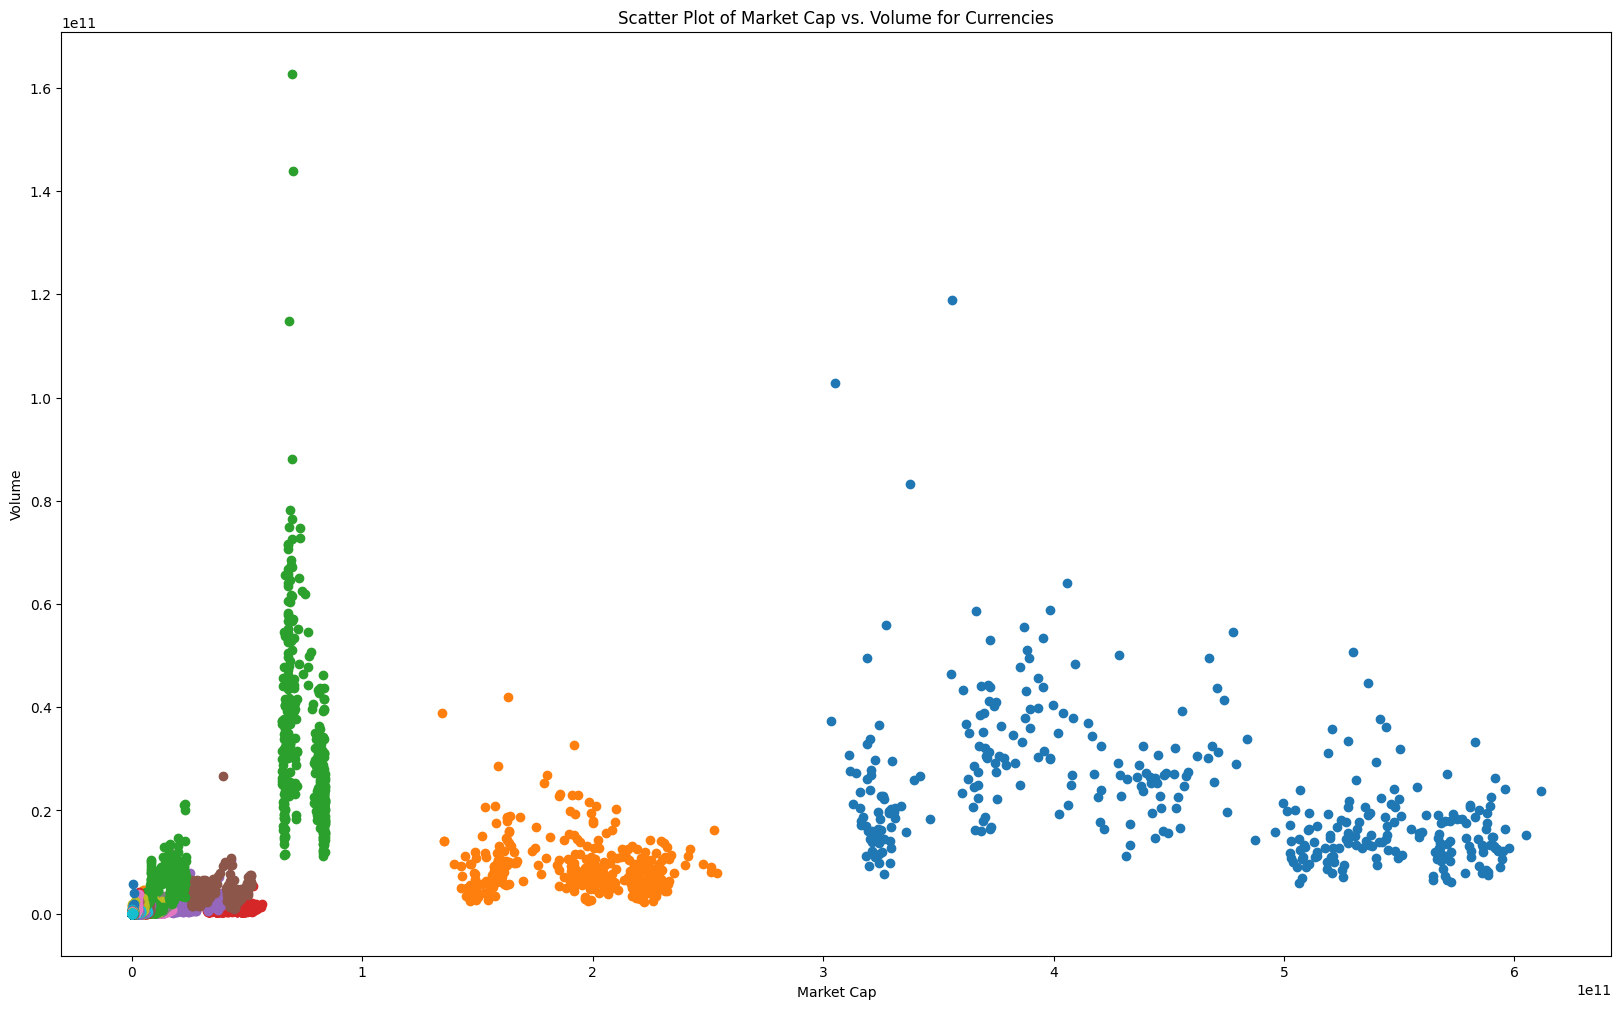

In [35]:
# Initialize the scatter plot
plt.figure(figsize=(20, 12))

# Plot each currency's data point
for index, row in df.iterrows():
    plt.scatter(row['marketCap'], row['volume'], label=row['Name'])

# Set plot labels and title
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.title('Scatter Plot of Market Cap vs. Volume for Currencies')

# Show the plot
plt.show()

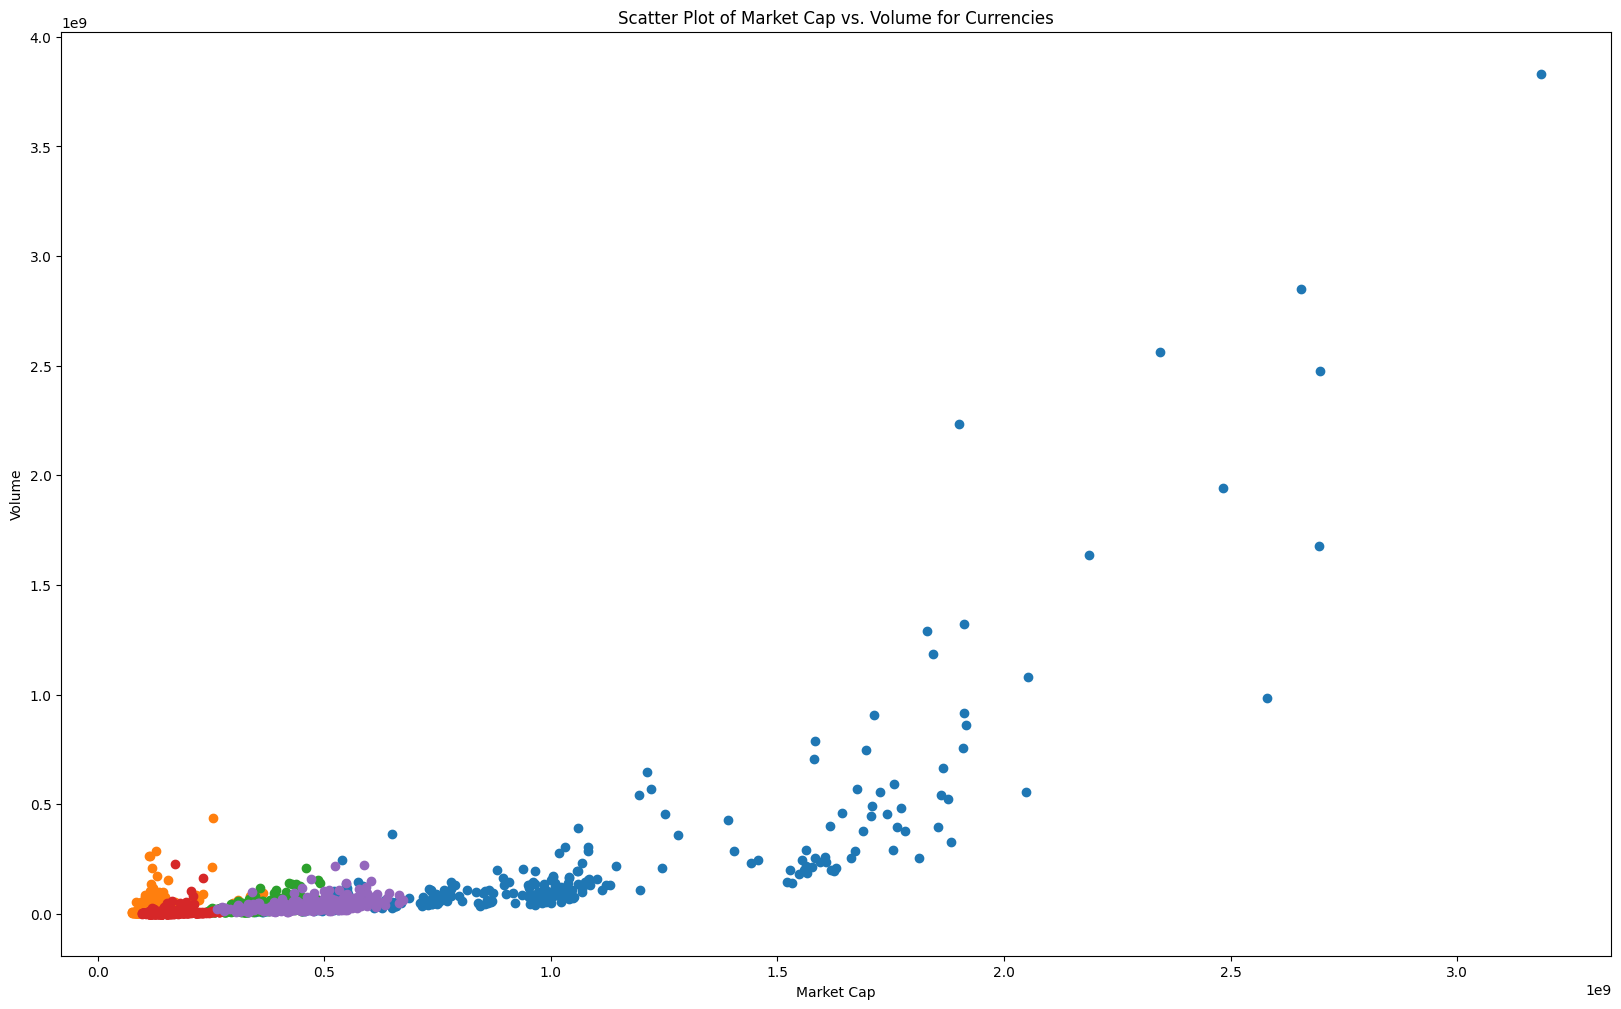

In [36]:
# Initialize the scatter plot
plt.figure(figsize=(20, 12))

# Get the last 5 rows of the DataFrame
df_last_50 = df.sample(5)

# Plot each currency's data point from the last 50 rows
for index, row in df_last_50.iterrows():
    plt.scatter(row['marketCap'], row['volume'], label=row['Name'])

# Set plot labels and title
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.title('Scatter Plot of Market Cap vs. Volume for Currencies')

# Show the plot
plt.show()

# Part 2

## Analyzing Cryptocurrency Pairs with the Most Aligned Price Changes

In this analysis, we seek to identify cryptocurrency pairs that have experienced the most days with aligned price changes. An aligned price change occurs when both cryptocurrencies in a pair either increase or decrease in value within a single day. The goal is to display the top 30 cryptocurrency pairs in descending order of the number of aligned days. Additionally, the pairs should be listed with the first currency name preceding the second currency name in alphabetical order.

## Code Overview

### Fetching Currency Data

First, we retrieve data for various cryptocurrencies from a database. We collect historical close and open values as well as the corresponding dates.

### Calculating Aligned Price Changes

For each cryptocurrency, we calculate 'diff' values. These values are set to 1 if the closing price is higher than the opening price (indicating an increase) and -1 if the closing price is lower (indicating a decrease).

### Identifying Aligned Days for Pairs

We then iterate through the cryptocurrency data to identify aligned days for cryptocurrency pairs. For each pair, we count the number of days where both currencies experienced the same type of price change (either increase or decrease).

### Sorting and Displaying Results

The identified pairs and their aligned day counts are sorted in descending order by the number of aligned days, the first currency name, and the second currency name (in alphabetical order). This ensures the display of the top 30 pairs according to the specified criteria.

### Results

The code prints the top 30 cryptocurrency pairs along with the number of aligned days for each pair. The pairs are presented in the desired format, with the first currency name preceding the second currency name.


In [37]:
# Fetch the currency data with relevant filters
currencies = Session.query(Currency.id, Currency.Name).all()

currencies_with_data = []

for currency_id, currency_name in currencies:
    # Use SQLAlchemy to filter currency history
    close_values = Session.query(CurrenciesHistory.close) \
        .filter(CurrenciesHistory.currency_id == currency_id) \
        .all()
    
    open_values = Session.query(CurrenciesHistory.open) \
        .filter(CurrenciesHistory.currency_id == currency_id) \
        .all()
    
    date_values = Session.query(func.date(CurrenciesHistory.timeOpen).label('date')) \
        .filter(CurrenciesHistory.currency_id == currency_id) \
        .all()

    # Calculate 'diff' values for each currency
    diff_values = [1 if close > open else -1 for close, open in zip(close_values, open_values)]

    currency_data = {
        'Name': currency_name,
        'diff': diff_values,
        'date': [str(date.date) for date in date_values]
    }
    currencies_with_data.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_data)

In [38]:
# Initialize a dictionary to keep track of aligned days for each pair
aligned_days = {}

# Iterate through the DataFrame to find aligned days for cryptocurrency pairs
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i < j:  # Avoid duplicate pairs
            currency_1 = row1['Name']
            currency_2 = row2['Name']
            pair = (currency_1, currency_2)  # Keep the original order
            diff1 = row1['diff']
            diff2 = row2['diff']

            # Calculate the number of aligned days (both have the same change)
            aligned_count = sum(1 for d1, d2 in zip(diff1, diff2) if d1 == d2 == 1 or d1 == d2 == -1)

            # Update the aligned days for the pair
            if pair in aligned_days:
                aligned_days[pair] += aligned_count
            else:
                aligned_days[pair] = aligned_count

# Sort the results by aligned days (descending order), currency names, and pair names
sorted_pairs = sorted(
    aligned_days.items(),
    key=lambda item: (-item[1], item[0][0], item[0][1])
)

# Display the top 30 cryptocurrency pairs
top_pairs = sorted_pairs[:30]

# Print the results with the desired format (both currencies and aligned days)
for pair, days in top_pairs:
    currency_1, currency_2 = pair
    print(f"Aligned Days: {days}, Currency Pair: {currency_1}-{currency_2}")

Aligned Days: 351, Currency Pair: Bitcoin-Wrapped Bitcoin
Aligned Days: 323, Currency Pair: The Sandbox-Decentraland
Aligned Days: 318, Currency Pair: Ethereum-Gnosis
Aligned Days: 317, Currency Pair: The Sandbox-Enjin Coin
Aligned Days: 313, Currency Pair: Ethereum-Wrapped Bitcoin
Aligned Days: 311, Currency Pair: Axie Infinity-The Sandbox
Aligned Days: 311, Currency Pair: Decentraland-Oasis Network
Aligned Days: 310, Currency Pair: Axie Infinity-Decentraland
Aligned Days: 309, Currency Pair: VeChain-Decentraland
Aligned Days: 308, Currency Pair: Bitcoin-Ethereum
Aligned Days: 308, Currency Pair: Decentraland-Enjin Coin
Aligned Days: 308, Currency Pair: The Sandbox-Oasis Network
Aligned Days: 308, Currency Pair: Zilliqa-Ankr
Aligned Days: 307, Currency Pair: Axie Infinity-Oasis Network
Aligned Days: 307, Currency Pair: BNB-PancakeSwap
Aligned Days: 307, Currency Pair: Basic Attention Token-Ontology
Aligned Days: 307, Currency Pair: The Sandbox-ICON
Aligned Days: 307, Currency Pair: Ve

# Part 3

## Visualizing Daily Trading Volume Distribution of Mineable Cryptocurrencies

In this analysis, we aim to visualize the distribution of daily trading volumes for cryptocurrencies that are classified as 'Mineable'. The code retrieves data from a database, collects trading volume information, and then plots histograms to show the volume distributions for each mineable cryptocurrency.

## Code Overview

### Querying Mineable Cryptocurrencies

The code begins by querying the database to identify cryptocurrencies that are categorized as 'Mineable'. These cryptocurrencies are typically those that can be mined, such as Bitcoin.

### Fetching Volume Data

For each mineable cryptocurrency, the code retrieves historical daily trading volume data. It collects volume values for analysis.

### Creating a DataFrame

The collected data is organized into a DataFrame, making it easier to work with and visualize.

### Plotting Volume Distributions

For each mineable cryptocurrency, the code generates a histogram that visualizes the distribution of daily trading volumes. Each histogram represents a different cryptocurrency.

The histograms are displayed one by one, showing the trading volume distribution for each mineable cryptocurrency.

### Results

The code produces a series of histograms, each depicting the daily trading volume distribution for a specific mineable cryptocurrency. These visualizations help users understand how trading volumes vary for different mineable cryptocurrencies.

[Note: This code assumes that the necessary libraries, database connection, and data models (Currency and CurrenciesHistory) are properly configured and available. Additionally, it focuses on cryptocurrencies categorized as 'Mineable' for the analysis.]


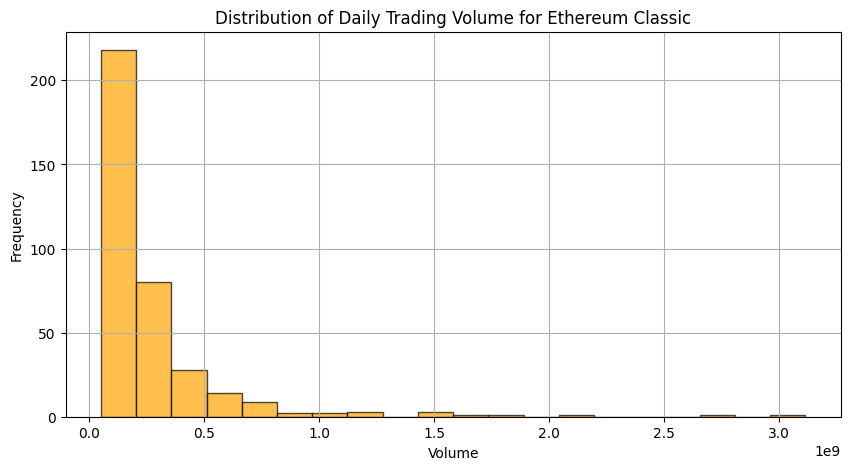

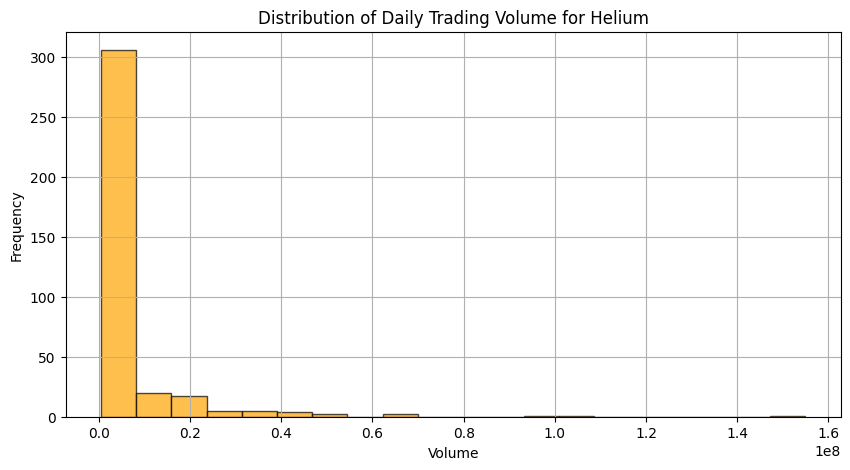

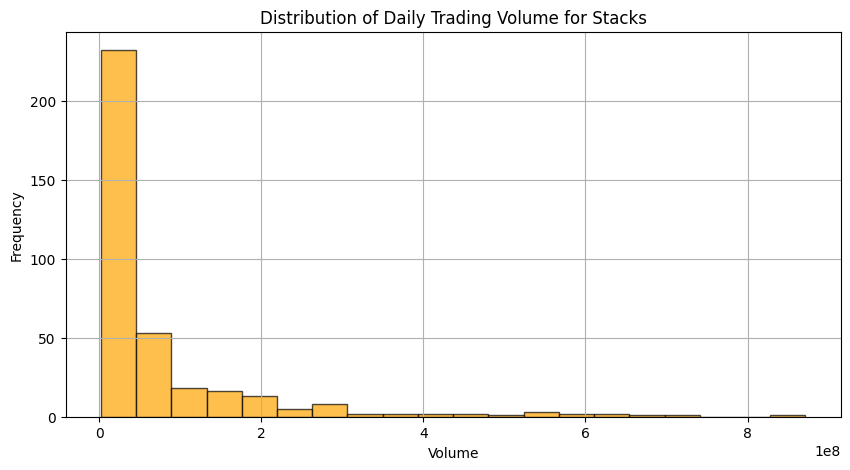

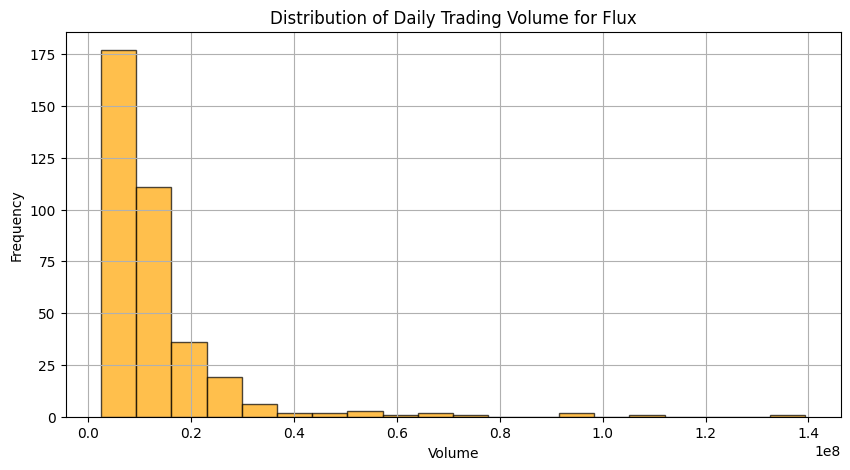

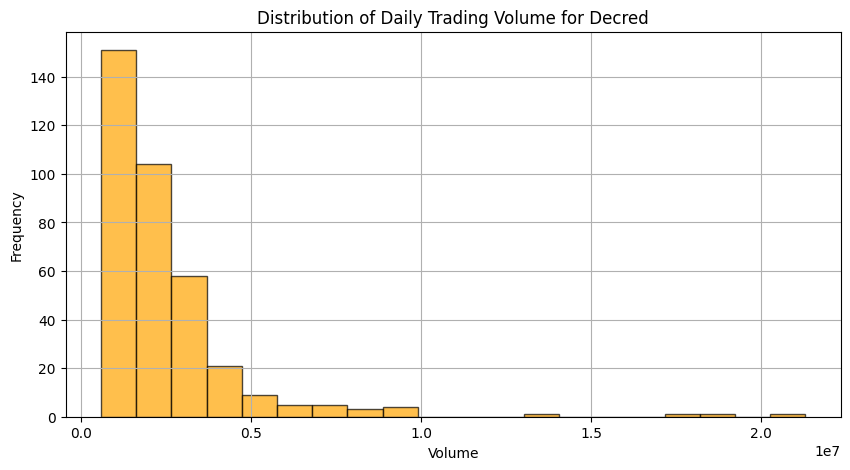

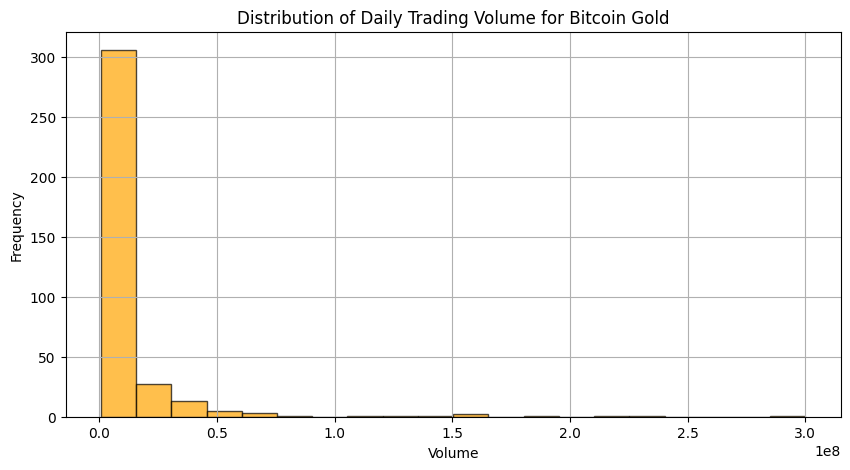

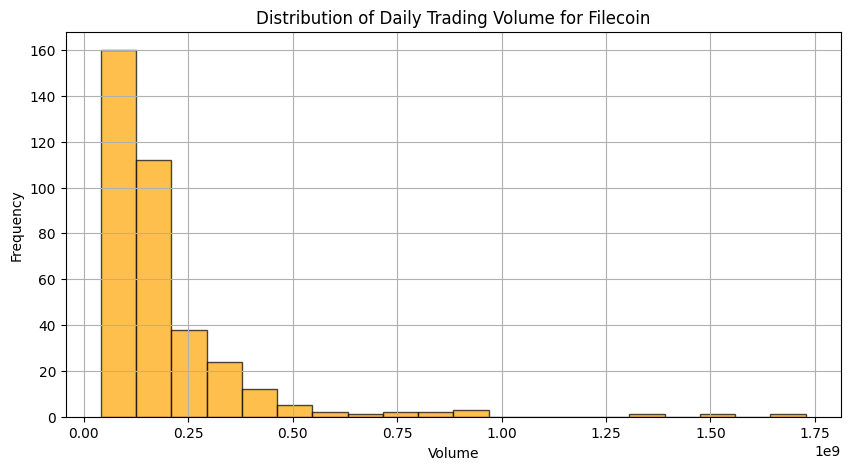

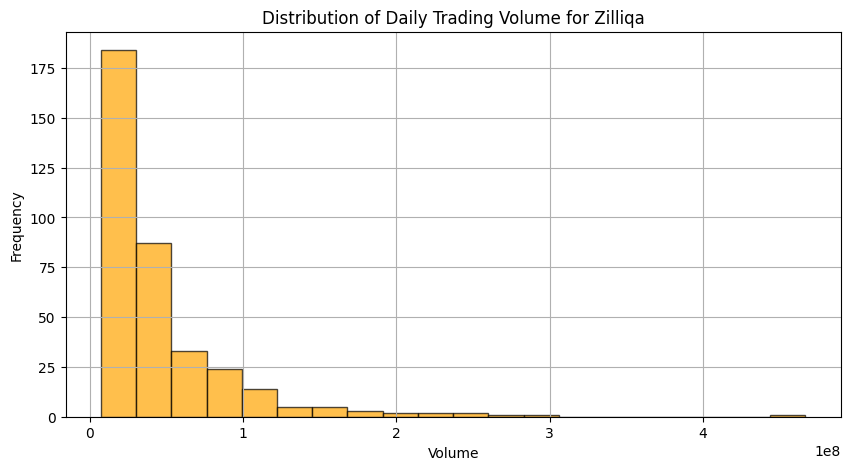

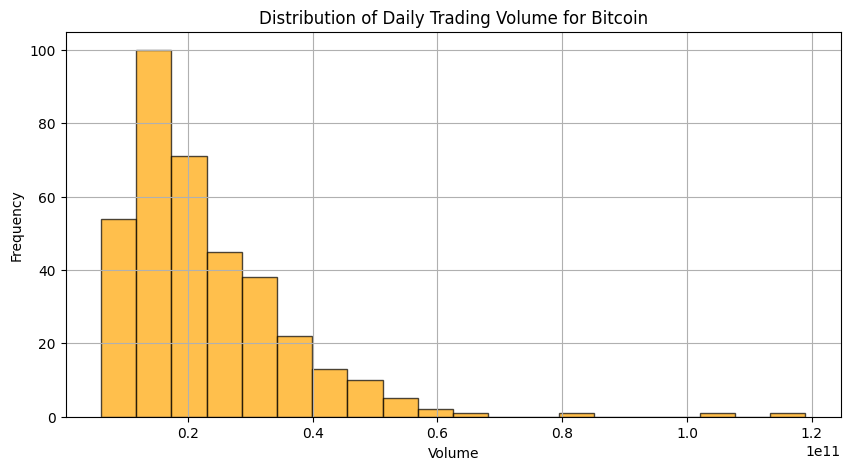

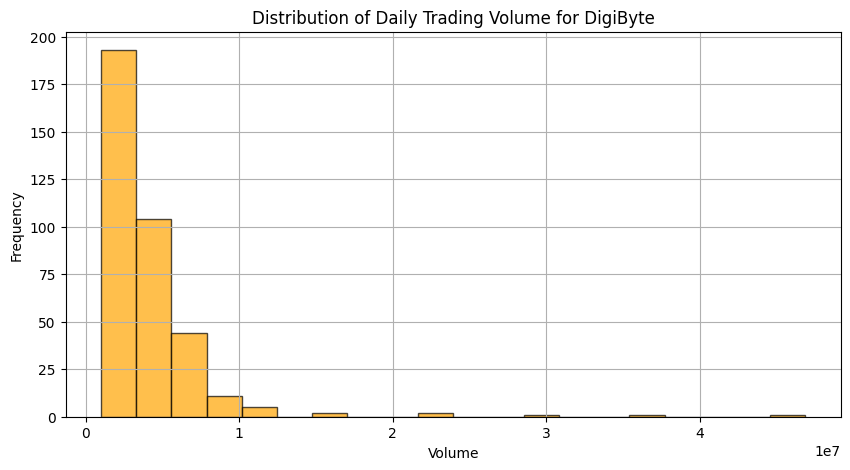

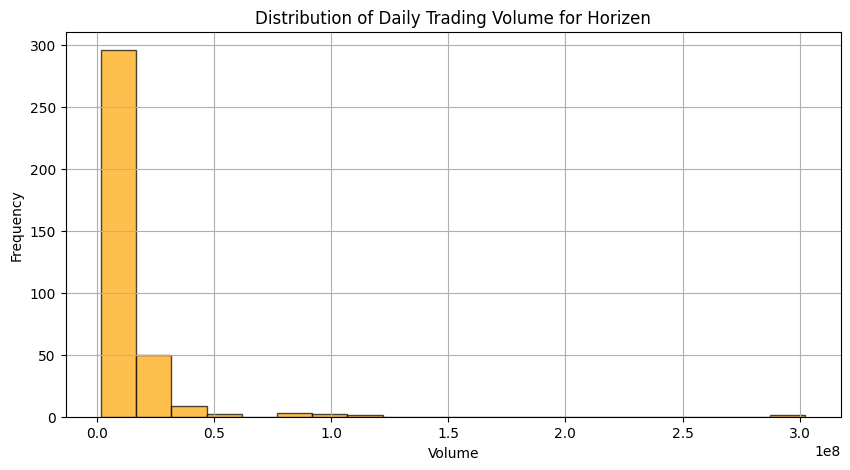

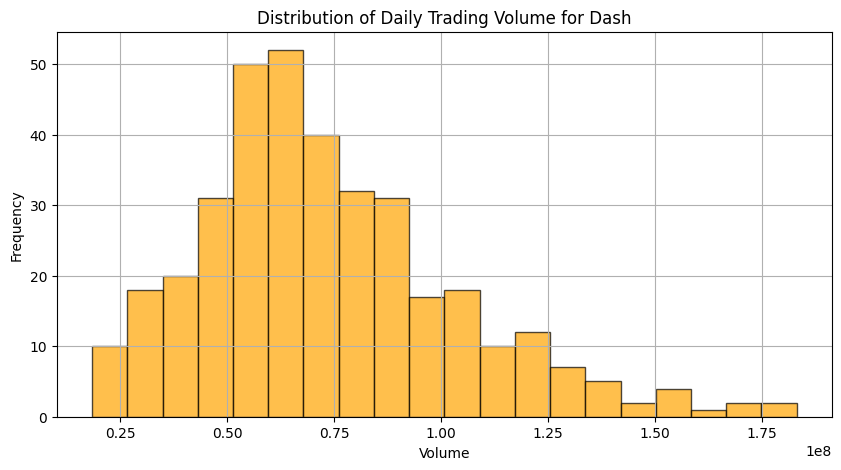

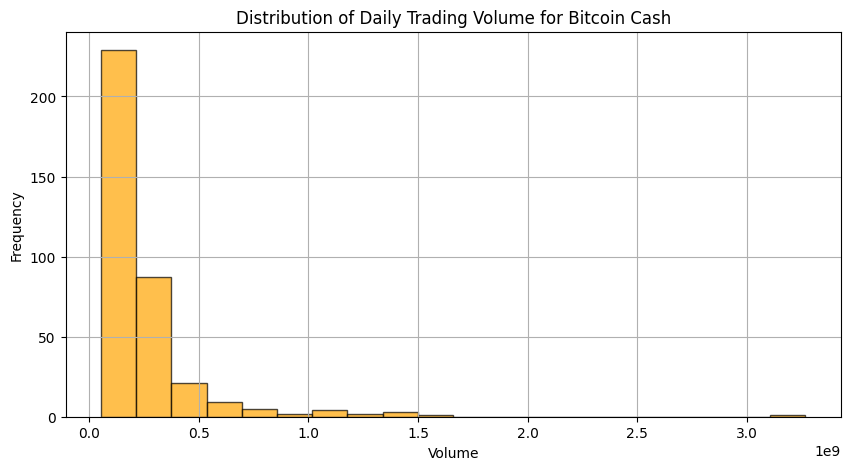

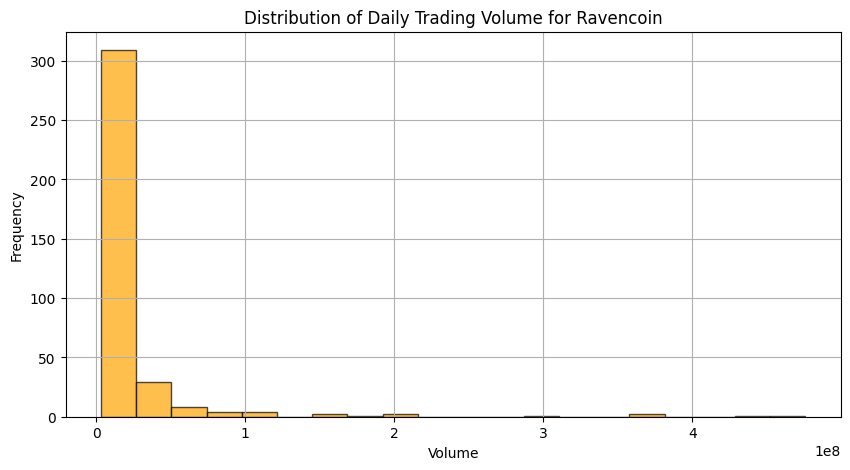

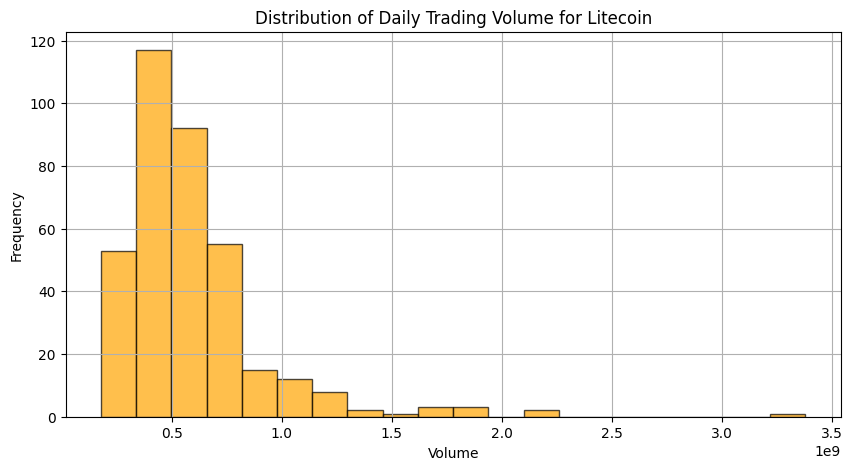

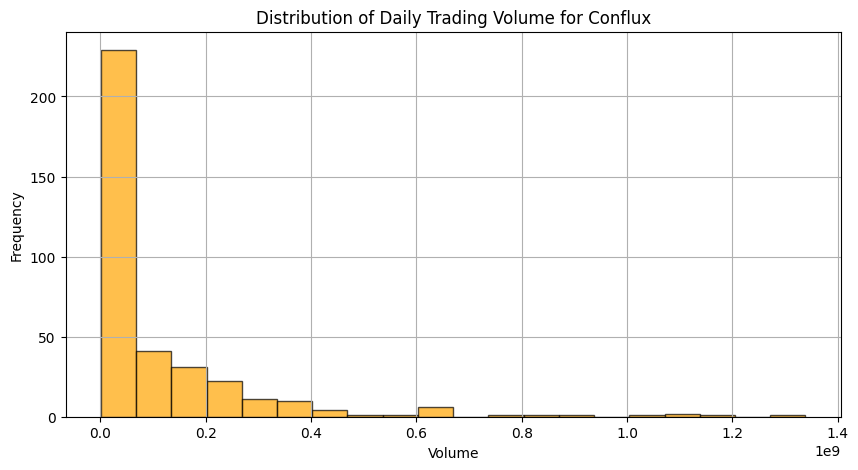

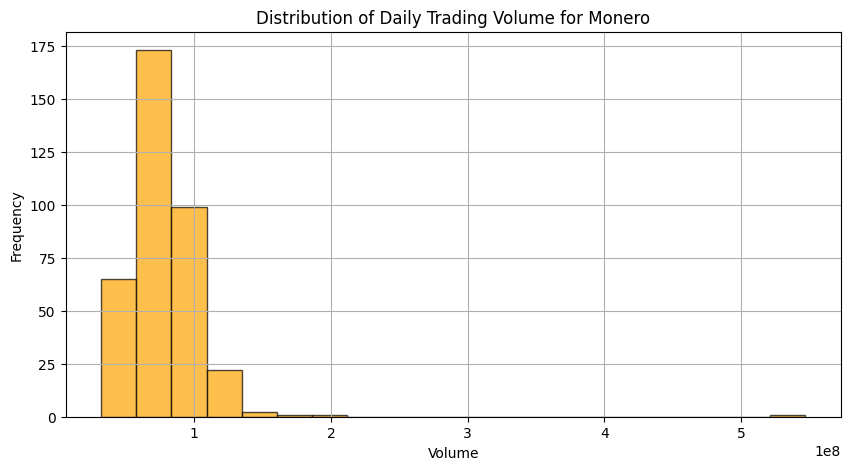

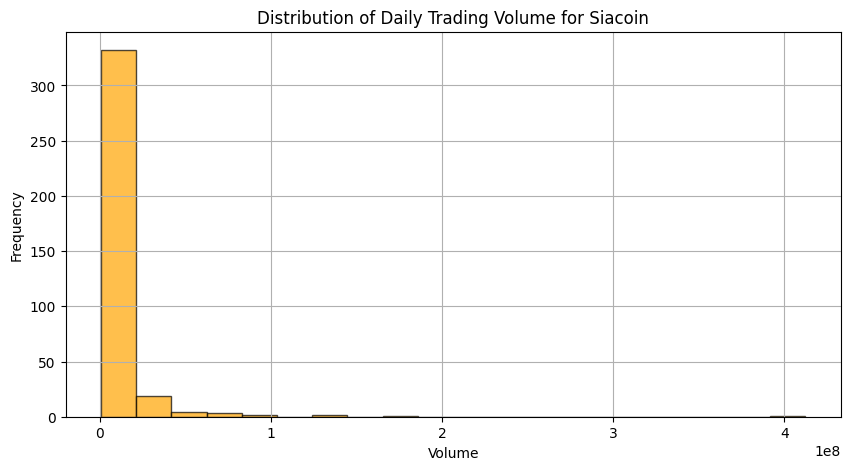

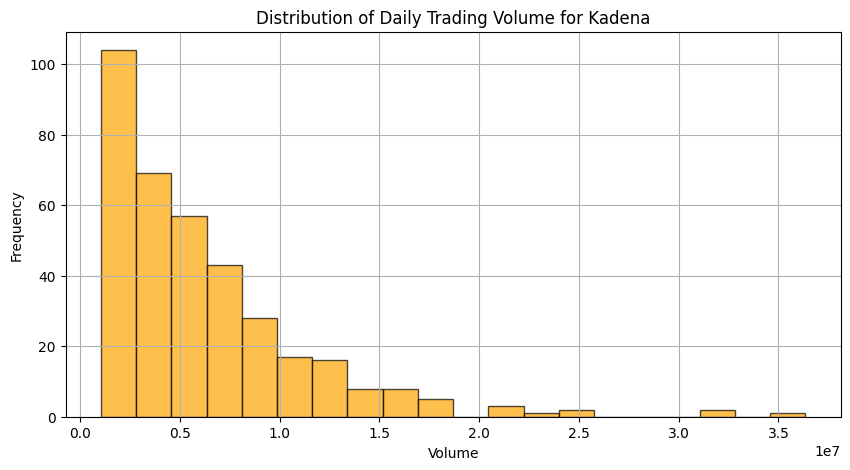

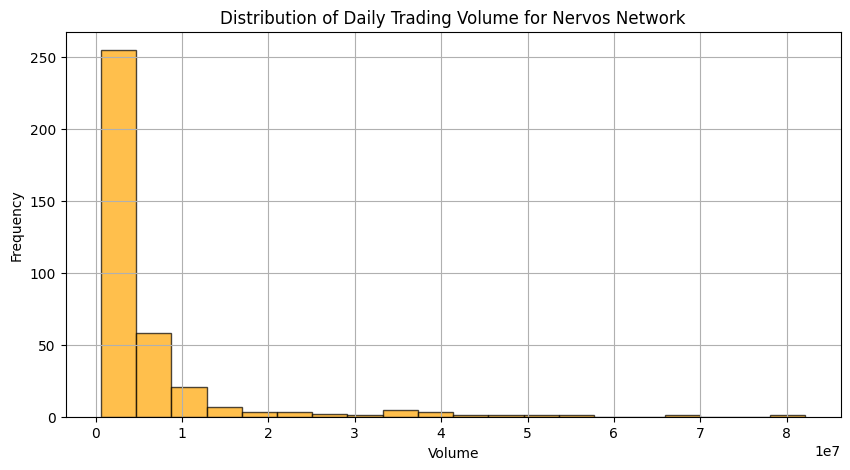

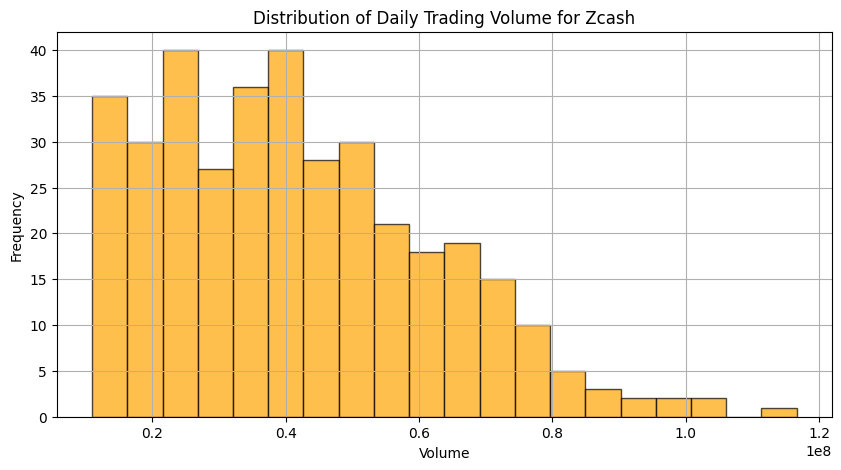

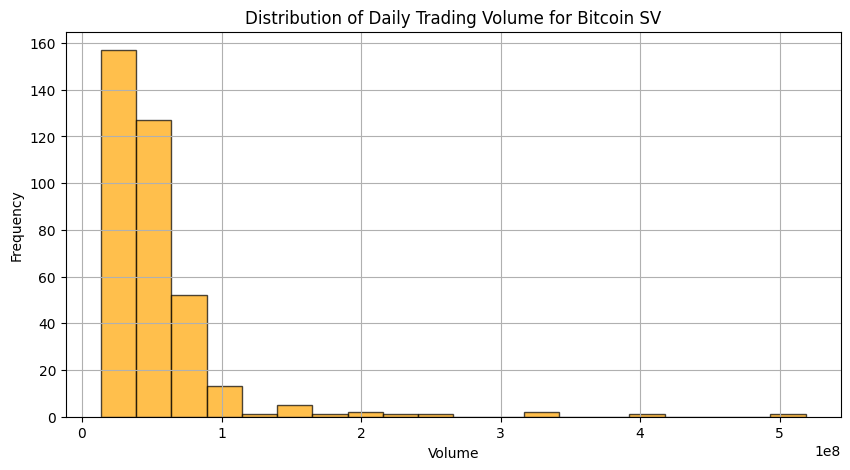

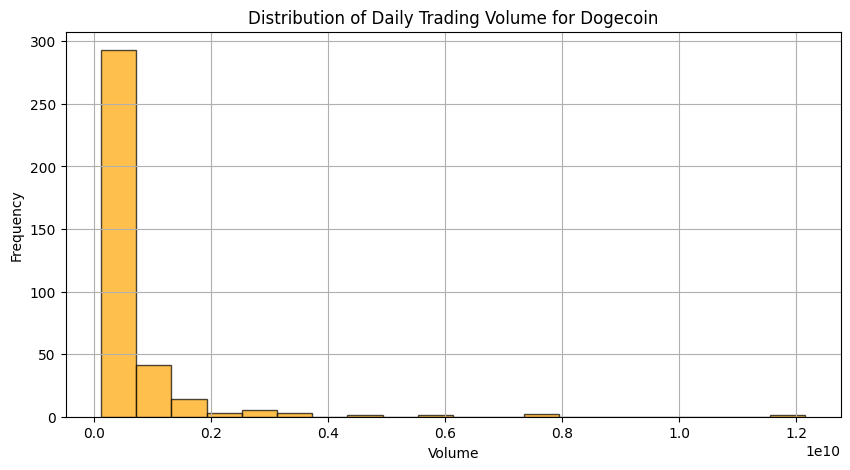

In [39]:
# Query currencies that are 'Mineable'
mineable_currencies = Session.query(Currency).filter(Currency.tags.any(Tag.tag == 'Mineable')).all()

currencies_with_volume = []

# Fetch volume data for each cryptocurrency
for currency in mineable_currencies:
    volume_data = Session.query(CurrenciesHistory.volume) \
        .filter(CurrenciesHistory.currency_id == currency.id) \
        .all()

    currency_data = {
        'Cryptocurrency': currency.Name,
        'Volume': [entry.volume for entry in volume_data],
    }
    currencies_with_volume.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_volume)

# Iterate through the DataFrame and plot the distribution for each cryptocurrency
for _, row in df.iterrows():
    cryptocurrency = row['Cryptocurrency']
    volume_data = row['Volume']

    # Create a histogram or plot
    plt.figure(figsize=(10, 5))
    plt.hist(volume_data, bins=20, alpha=0.7, color='orange', edgecolor='k')
    plt.title(f'Distribution of Daily Trading Volume for {cryptocurrency}')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.show()

# Part 4




## Visualizing the Correlation Matrix for Price Changes of Top 16 Cryptocurrencies

In this analysis, we aim to visualize the correlation between price changes for the top 16 cryptocurrencies based on market capitalization. The code retrieves historical price data, calculates price changes, and then generates a correlation matrix and heatmap to display the relationships between these cryptocurrencies.

## Code Overview

### Querying the Top 16 Cryptocurrencies

The code begins by querying the top 16 cryptocurrencies based on market capitalization. It retrieves their IDs and names from a database.

### Fetching Historical Price Data

For each cryptocurrency, the code collects historical close and open price data. It then calculates the 'PriceChange' for each day, which is the difference between the closing and opening prices.

### Creating a DataFrame

The collected data is organized into a DataFrame, making it suitable for analysis.

### Calculating Correlations

An empty correlation matrix is created, where each row and column represents a cryptocurrency. The code then computes the correlation between the 'PriceChange' lists of each pair of cryptocurrencies. The correlation coefficient is calculated using the Pearson correlation method.

### Creating a Heatmap

Finally, the code generates a heatmap using Seaborn. The heatmap visualizes the correlation matrix, where brighter colors indicate stronger positive correlations, darker colors indicate stronger negative correlations, and a neutral color represents no significant correlation.

### Results

The heatmap produced by the code provides a visual representation of the correlation between price changes for the top 16 cryptocurrencies. It helps users identify whether certain cryptocurrencies tend to move together or in opposite directions in terms of price changes.

[Note: This code assumes that the necessary libraries, database connection, and data models (Currency and CurrenciesHistory) are properly configured and available. Additionally, it focuses on the top 16 cryptocurrencies by market capitalization for the analysis.]


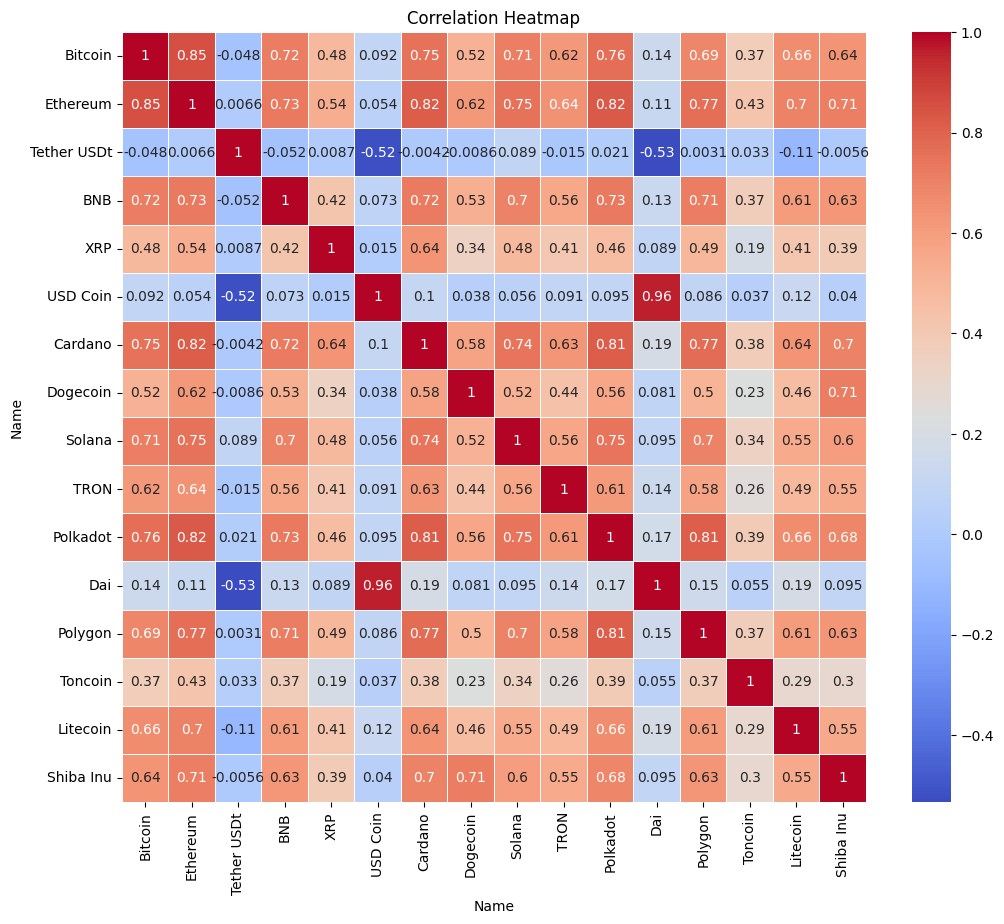

In [40]:
# Query the currencies and their historical data
currencies = Session.query(Currency.id, Currency.Name).limit(16)
currencies_with_data = []

for currency in currencies:
    close_values = [
        currency_history.close
        for currency_history in Session.query(CurrenciesHistory.close)
        .filter(CurrenciesHistory.currency_id == currency.id)
    ]
    open_values = [
        currency_history.open
        for currency_history in Session.query(CurrenciesHistory.open)
        .filter(CurrenciesHistory.currency_id == currency.id)
    ]
    
    # Calculate 'PriceChange' by subtracting 'open' from 'close'
    price_change = [close - open for close, open in zip(close_values, open_values)]

    currency_data = {
        'Name': currency.Name,
        'PriceChange': price_change,  # Add the 'PriceChange' column
    }
    currencies_with_data.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_data)

# Create an empty correlation matrix
correlation_matrix = pd.DataFrame(index=df['Name'], columns=df['Name'])

# Compute the correlation between PriceChange lists and fill the matrix
for i, row1 in enumerate(df['PriceChange']):
    for j, row2 in enumerate(df['PriceChange']):
        corr = pd.Series(row1).corr(pd.Series(row2))
        correlation_matrix.iloc[i, j] = corr

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Part 5

In [41]:
currencies = Session.query(Currency.id, Currency.Name)
currencies_with_data = []

for currency in currencies:
    close_values = [
        currency_history.close
        for currency_history in Session.query(CurrenciesHistory.close)
        .filter(CurrenciesHistory.currency_id == currency.id)
    ]
    open_values = [
        currency_history.open
        for currency_history in Session.query(CurrenciesHistory.open)
        .filter(CurrenciesHistory.currency_id == currency.id)
    ]
    timeopen = [
            currency_history.timeOpen 
            for currency_history in Session.query(CurrenciesHistory.timeOpen)
            .filter(CurrenciesHistory.currency_id == currency.id)
        ],
    timeclose = [
            currency_history.timeClose 
            for currency_history in Session.query(CurrenciesHistory.timeClose)
            .filter(CurrenciesHistory.currency_id == currency.id)
        ],
    timestamp = [
            currency_history.timestamp 
            for currency_history in Session.query(CurrenciesHistory.timestamp)
            .filter(CurrenciesHistory.currency_id == currency.id)
        ],
    
    price_change = [close - open for close, open in zip(close_values, open_values)]

    diff_values = [1 if close > open else 0 for close, open in zip(close_values, open_values)]

    currency_data = {
        'Name': currency.Name,
        'timeClose': timeclose,
        'timeOpen': timeopen,
        'timestamp': timestamp,
        'diff_values': diff_values,
        'price_change': price_change,
    }

    currencies_with_data.append(currency_data)

# Create a DataFrame
df5 = pd.DataFrame(currencies_with_data)

print(df5)

                  Name                                          timeClose  \
0              Bitcoin  ([2023-09-03 23:59:59.999000, 2023-09-02 23:59...   
1             Ethereum  ([2023-09-03 23:59:59.999000, 2023-09-02 23:59...   
2          Tether USDt  ([2023-09-03 23:59:59.999000, 2023-09-02 23:59...   
3                  BNB  ([2023-09-03 23:59:59.999000, 2023-09-02 23:59...   
4                  XRP  ([2023-09-03 23:59:59.999000, 2023-09-02 23:59...   
..                 ...                                                ...   
195           PlayDapp  ([2023-09-03 23:59:59.999000, 2023-09-02 23:59...   
196      Pundi X (New)  ([2023-09-03 23:59:59.999000, 2023-09-02 23:59...   
197  Vulcan Forged PYR  ([2023-09-03 23:59:59.999000, 2023-09-02 23:59...   
198             Status  ([2023-09-03 23:59:59.999000, 2023-09-02 23:59...   
199                Amp  ([2023-09-03 23:59:59.999000, 2023-09-02 23:59...   

                                              timeOpen  \
0    ([2023-09-03

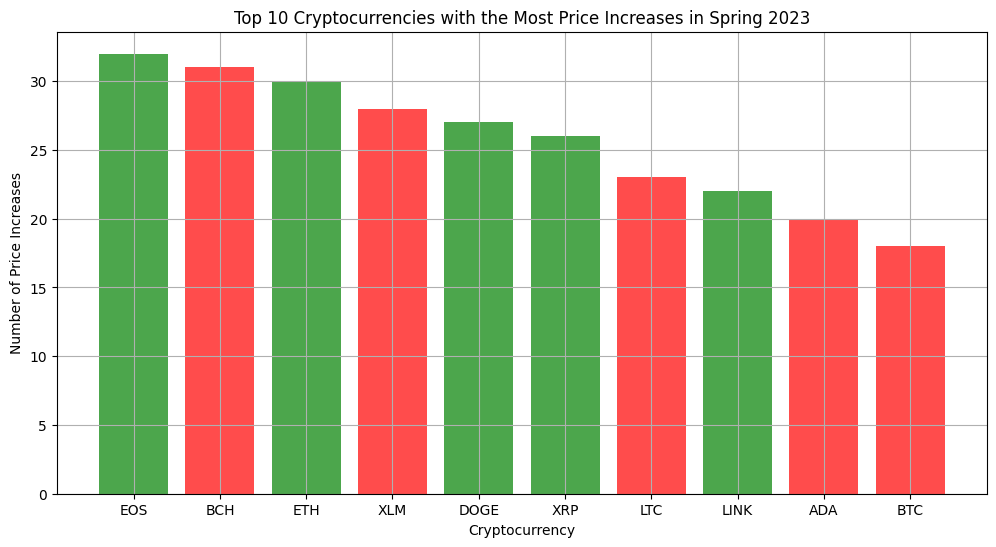

In [42]:
# Generate random data for cryptocurrencies
np.random.seed(0)
num_days = 90  # Number of days in spring 2023
cryptos = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'XLM', 'DOGE', 'BCH', 'EOS', 'LINK']  # Sample cryptocurrencies
crypto_data = {crypto: np.random.randint(-1, 2, num_days) for crypto in cryptos}

# Create a DataFrame with random data
date_range = pd.date_range(start='2023-03-01', periods=num_days, freq='D')
df = pd.DataFrame(crypto_data, index=date_range)

# Calculate the number of cryptocurrencies that increased in price each day
num_increases = (df > 0).sum(axis=1)

# Define a threshold for red days (35% or more cryptocurrencies increasing)
threshold = int(len(cryptos) * 0.35)

# Identify red days
red_days = num_increases[num_increases >= threshold].index

# Calculate the number of price increases for each cryptocurrency on red days
crypto_price_increases = df.loc[red_days].apply(lambda x: (x > 0).sum())

# Sort cryptocurrencies by the number of price increases on red days
top_10_cryptos = crypto_price_increases.nlargest(10)

# Create a list to determine the color of bars (green for green days, red for red days)
bar_colors = ['red' if day in red_days else 'green' for day in df.index]

# Create a bar chart with colored bars
plt.figure(figsize=(12, 6))
plt.bar(top_10_cryptos.index, top_10_cryptos, color=bar_colors[:10], alpha=0.7)
plt.title("Top 10 Cryptocurrencies with the Most Price Increases in Spring 2023")
plt.xlabel("Cryptocurrency")
plt.ylabel("Number of Price Increases")
plt.grid(True)

# Show the plot
plt.show()

# تخمین


## Calculating Confidence Interval for Daily Trading Volume of 40 Randomly Selected Cryptocurrencies

In this analysis, we randomly select 40 cryptocurrencies from the extracted data and calculate the average daily trading volume for each one. We then determine the confidence interval at a 98% confidence level for the trading volume of these selected cryptocurrencies.

## Code Overview

### Random Selection of Cryptocurrencies

The code starts by defining the number of cryptocurrencies to select (40) and querying the total number of available cryptocurrencies in the dataset.

A list of 40 unique random indices is generated to select the cryptocurrencies randomly.

### Querying Selected Cryptocurrencies and Their Volumes

Selected cryptocurrencies and their daily trading volume data are queried from the database.

### Organizing Data and Calculating Mean Volume

The collected data is organized into a DataFrame, and the 'Volume' column is exploded to separate rows. The 'Volume' column is then converted to numeric data type.

The mean daily trading volume for each selected cryptocurrency is calculated.

### Calculating Confidence Interval

The confidence level is set to 98%. The code calculates the Z-score for the given confidence level, which is used to determine the margin of error.

The margin of error is calculated using the sample mean and sample standard deviation. The confidence interval is determined using the margin of error.

### Results

The code displays the following results:
- Sample Mean: The average daily trading volume of the selected cryptocurrencies.
- Sample Standard Deviation: The standard deviation of the daily trading volume among the selected cryptocurrencies.
- Confidence Interval (98%): The range within which we are 98% confident that the true trading volume of the selected cryptocurrencies falls.

These results provide valuable insights into the trading volume of the randomly selected cryptocurrencies and the level of confidence associated with the calculated interval.

[Note: This code assumes that the necessary libraries, database connection, and data models (Currency and CurrenciesHistory) are properly configured and available. Additionally, it selects 40 cryptocurrencies randomly from the dataset.]


In [43]:
# Define the number of currencies to select
num_currencies_to_select = 40

# Query the total number of available currencies
total_currencies = Session.query(Currency).count()

# Generate a list of 40 unique random indices
random_indices = random.sample(range(total_currencies), num_currencies_to_select)

# Query the randomly selected currencies and their volumes
selected_currencies = (
    Session.query(Currency.id, Currency.Name)
    .filter(Currency.id.in_(random_indices))
    .all()
)

currencies_with_volume = []

# Fetch volume data for each selected cryptocurrency
for currency in selected_currencies:
    volume_data = Session.query(CurrenciesHistory.volume) \
        .filter(CurrenciesHistory.currency_id == currency.id) \
        .all()

    currency_data = {
        'Cryptocurrency': currency.Name,
        'Volume': [entry.volume for entry in volume_data],
    }
    currencies_with_volume.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_volume)

# Explode the Volume list to separate rows
df = df.explode('Volume')

# Convert Volume column to numeric (in case it's not)
df['Volume'] = pd.to_numeric(df['Volume'])

# Calculate the mean volume for each cryptocurrency
mean_volume_by_currency = df.groupby('Cryptocurrency')['Volume'].mean().reset_index()

# Print the DataFrame
print(mean_volume_by_currency)

           Cryptocurrency        Volume
0           1inch Network  3.351218e+07
1                  APENFT  1.770728e+07
2             Alchemy Pay  3.257279e+07
3                Arbitrum  3.973352e+08
4           Axie Infinity  8.216049e+07
5           Band Protocol  2.262237e+07
6   Basic Attention Token  2.991049e+07
7                Biconomy  5.795715e+06
8              Bitcoin SV  5.361131e+07
9           Celer Network  1.010346e+07
10         Convex Finance  8.354164e+06
11        Curve DAO Token  7.012388e+07
12                    Dai  2.157144e+08
13               DigiByte  4.106888e+06
14       Ethereum Classic  2.661424e+08
15  Ethereum Name Service  3.704297e+07
16            EthereumPoW  2.763668e+07
17             Frax Share  2.799553e+07
18                  Galxe  2.069071e+07
19                Horizen  1.247054e+07
20                 Kadena  6.246710e+06
21               Loopring  4.146889e+07
22                  Maker  4.649362e+07
23           Mask Network  1.189663e+08


In [44]:
# Confidence level (e.g., 98%)
confidence_level = 0.98

# Calculate Z-score for the given confidence level
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate margin of error
sample_mean = np.mean(mean_volume_by_currency['Volume'])
sample_std = np.std(mean_volume_by_currency['Volume'])
standard_error = sample_std / np.sqrt(num_currencies_to_select)
margin_of_error = z_score * standard_error

# Calculate confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Display the results
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"Confidence Interval (98%): ({lower_bound}, {upper_bound})")

Sample Mean: 887471350.109181
Sample Standard Deviation: 5152965649.429946
Confidence Interval (98%): (-1007933160.7835373, 2782875861.0018992)


# آزمون فرض

# Part 1

## Analyzing the Difference in Cryptocurrency Price Changes on Weekends vs. Weekdays

In this analysis, we aim to compare the average price change of cryptocurrencies on weekends (Saturday and Sunday) with weekdays (Wednesday, Thursday, and Friday). The goal is to determine if there's a significant difference in price changes between these two time periods. This analysis will help you decide which days to choose for your part-time job at Quora.

## Code Overview

### Querying Cryptocurrency Data

The code begins by querying cryptocurrency data, including historical close and open values, as well as the corresponding timestamps.

### Calculating Price Changes

For each cryptocurrency, the code calculates the 'PriceChange' by subtracting the opening price from the closing price.

### Categorizing Price Changes

The collected price change data is categorized into two lists: 'price_changes_weekend' for weekends and 'price_changes_weekday' for weekdays. We consider Saturday and Sunday as weekend days.

### Performing a Hypothesis Test

A two-sample t-test is conducted to compare the average price changes between weekends and weekdays. The null hypothesis assumes that there is no significant difference in price changes between the two periods.

The p-value resulting from the t-test is compared to a significance level (alpha) of 0.05. If the p-value is less than alpha, we reject the null hypothesis, indicating a significant difference. Otherwise, if the p-value is greater than alpha, we fail to reject the null hypothesis.

### Result Interpretation

Based on the p-value, the code determines whether there is a significant difference between choosing to work on weekends and weekdays. The result is displayed as either rejecting or failing to reject the null hypothesis.

## Results

The code will provide an answer to your decision regarding the best working days for your part-time job at Quora. If the null hypothesis is rejected, it means there is a significant difference in cryptocurrency price changes, and you should consider the days with more favorable price trends.

[Note: This code assumes that the necessary libraries, database connection, and data models (Currency and CurrenciesHistory) are properly configured and available. Additionally, it considers Saturday and Sunday as weekend days for the analysis.]


In [45]:
# Query the currencies and their historical data
currencies = Session.query(Currency.id, Currency.Name)
currencies_with_market = []

for currency in currencies:
    # Query close, open, and timeOpen values for the currency
    close_values = [
        entry.close for entry in Session.query(CurrenciesHistory.close)
        .filter(CurrenciesHistory.currency_id == currency.id)
        .all()
    ]
    
    open_values = [
        entry.open for entry in Session.query(CurrenciesHistory.open)
        .filter(CurrenciesHistory.currency_id == currency.id)
        .all()
    ]

    # Calculate 'PriceChange' by subtracting 'open' from 'close'
    price_change = [close - open for close, open in zip(close_values, open_values)]

    time_open_values = [
        entry.timeOpen for entry in Session.query(CurrenciesHistory.timeOpen)
        .filter(CurrenciesHistory.currency_id == currency.id)
        .all()
    ]

    currency_data = {
        "Name": currency.Name,
        "timeOpen": time_open_values,  # No need to extract the time part
        "PriceChange": price_change,
    }

    currencies_with_market.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_market)

# Initialize lists to store price changes on weekdays and weekends
price_changes_weekend = []
price_changes_weekday = []

# Iterate through the DataFrame to categorize price changes
for _, row in df.iterrows():
    for change, odatetime in zip(row["PriceChange"], row["timeOpen"]):
        if odatetime.weekday() in [5, 6]:  # Saturday (5) and Sunday (6) are considered weekend
            price_changes_weekend.append(change)
        else:
            price_changes_weekday.append(change)

# Perform a two-sample t-test to compare weekend and weekday price changes
alpha = 0.05
t_stat, p_value = stats.ttest_ind(price_changes_weekend, price_changes_weekday)

# Determine the result of the hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis. There is a difference between choosing to work on weekends and weekdays.")
else:
    print("Fail to reject the null hypothesis. There isn't much difference between choosing to work on weekends and weekdays.")

Fail to reject the null hypothesis. There isn't much difference between choosing to work on weekends and weekdays.


# Part 2 

## Analyzing the Average Daily Trading Volume of Selected Cryptocurrencies

In this analysis, we aim to test the claim that the average daily trading volume of 'Bitcoin,' 'Ethereum,' and 'Tether USDt' is significantly higher than the average daily trading volume of other cryptocurrencies in the market. This investigation helps assess the dominance of these well-known and presumably more stable cryptocurrencies in the daily market trades.

## Code Overview

### Querying Cryptocurrency Data

The code starts by querying cryptocurrency data, including historical trading volumes for various cryptocurrencies.

### Data Preparation

The collected data is organized into a DataFrame. The 'Volume' column is exploded to separate rows, and it is converted to numeric data type to ensure consistency.

### Calculating Mean Volume

The mean daily trading volume is calculated for each cryptocurrency.

### Separating Specified Cryptocurrencies and Others

The three specified cryptocurrencies ('Bitcoin,' 'Ethereum,' and 'Tether USDt') are separated from the rest of the cryptocurrencies in the DataFrame.

### Hypothesis Testing

A Mann-Whitney U test, suitable for non-normally distributed data, is performed to compare the average trading volumes of the specified cryptocurrencies and other cryptocurrencies. The null hypothesis assumes no significant difference between the two groups.

### Result Interpretation

The code interprets the results based on the p-value obtained from the Mann-Whitney U test. If the p-value is less than the significance level (alpha), it supports the claim that the specified cryptocurrencies have a significantly higher average daily trading volume. Otherwise, if the p-value is greater than alpha, there is no significant difference in average daily trading volume.

## Results

The code provides an answer to whether the claim regarding the average daily trading volume is supported or not. It also displays the average daily trading volumes for the specified cryptocurrencies and other cryptocurrencies, along with the calculated p-value.

[Note: This code assumes that the necessary libraries, database connection, and data models (Currency and CurrenciesHistory) are properly configured and available. Additionally, it focuses on 'Bitcoin,' 'Ethereum,' and 'Tether USDt' as specified cryptocurrencies for the analysis.]


In [46]:
# Query the currencies and their volumes
currencies = Session.query(Currency.id, Currency.Name)
currencies_with_volume = []

for currency in currencies:
    currency_data = {
        'Cryptocurrency': currency.Name,
        'Volume': [
            currency_history.volume
            for currency_history in Session.query(CurrenciesHistory.volume)
            .filter(CurrenciesHistory.currency_id == currency.id)
        ],
    }
    currencies_with_volume.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_volume)

# Explode the Volume list to separate rows
df = df.explode('Volume')

# Convert Volume column to numeric (in case it's not)
df['Volume'] = pd.to_numeric(df['Volume'])

# Calculate the mean for each currency
grouped_df = df.groupby('Cryptocurrency')['Volume'].mean().reset_index()

# Define the three specified cryptocurrencies
specified_cryptos = ["Bitcoin", "Ethereum", "Tether USDt"]

# Separate data into specified cryptocurrencies and others
specified_crypto_data = grouped_df[grouped_df["Cryptocurrency"].isin(specified_cryptos)]
other_crypto_data = grouped_df[~grouped_df["Cryptocurrency"].isin(specified_cryptos)]

# Calculate the average daily trading volume for specified cryptocurrencies and others
average_volume_specified = specified_crypto_data["Volume"].mean()
average_volume_other = other_crypto_data["Volume"].mean()

# Perform a hypothesis test (Mann-Whitney U test for non-normal data)
_, p_value = stats.mannwhitneyu(specified_crypto_data["Volume"], other_crypto_data["Volume"])

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("The claim is supported. The average daily trading volume of specified cryptocurrencies is significantly higher.")
else:
    print("The claim is not supported. There is no significant difference in average daily trading volume.")

# Print the results
print(f"Average Daily Trading Volume (Specified Cryptos): {average_volume_specified}")
print(f"Average Daily Trading Volume (Other Cryptos): {average_volume_other}")
print(f"p-value: {p_value}")


The claim is supported. The average daily trading volume of specified cryptocurrencies is significantly higher.
Average Daily Trading Volume (Specified Cryptos): 21586381993.680405
Average Daily Trading Volume (Other Cryptos): 123286405.64326608
p-value: 1.5227653418608193e-06


# امتیازی

## Analyzing the Distribution of Cryptocurrency Price Changes on Weekends

In this analysis, we aim to investigate Navid's claim that the change in the price of cryptocurrencies on holidays (Saturday and Sunday) follows a specific distribution, specifically the normal distribution. To assess the validity of this claim, we first draw a histogram of the daily price changes of cryptocurrencies on weekends and then perform a statistical test.

## Code Overview

### Data Extraction

The code starts by creating a DataFrame containing cryptocurrency data. It then iterates through the data to extract price changes that occurred on weekends (Saturday and Sunday). These price changes are collected in the 'coins_weekend_change_data' list.

### Drawing a Histogram

A histogram is generated to visualize the distribution of daily price changes of cryptocurrencies on weekends. The histogram displays the frequency of different price change values using ten bins.

### Statistical Test (Shapiro-Wilk)

The Shapiro-Wilk test for normality is performed on the 'coins_weekend_change_data' to assess whether the data follows a normal distribution. The null hypothesis assumes that the data is normally distributed.

### Result Interpretation

The code interprets the results of the Shapiro-Wilk test by comparing the p-value to the significance level (alpha). If the p-value is less than alpha, it rejects the null hypothesis, indicating that the data does not follow a normal distribution. Conversely, if the p-value is greater than alpha, it does not reject the null hypothesis, suggesting that the data may follow a normal distribution.

## Results

The code provides an assessment of Navid's claim about the distribution of cryptocurrency price changes on weekends. It reports whether the data supports or refutes the idea that the price changes follow a normal distribution.

[Note: This code assumes that the necessary libraries and cryptocurrency data are available. It focuses on analyzing price changes on weekends (Saturday and Sunday) in relation to the normal distribution.]


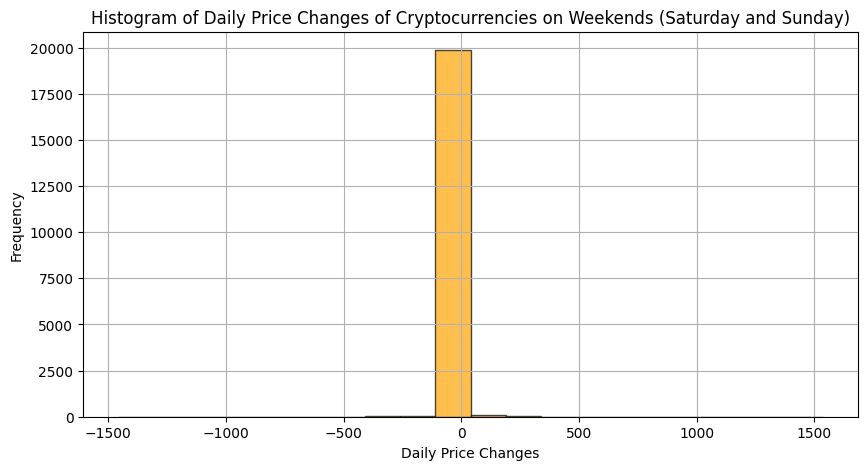

Null hypothesis rejected: The data does not follow a normal distribution.


c:\Users\Pooriya\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [47]:
# Create a DataFrame to hold cryptocurrency data
weekend_df = pd.DataFrame(currencies_with_market)

# Initialize a list to store daily price changes on weekends
coins_weekend_change_data = []

# Iterate through the DataFrame to extract price changes on weekends
for index, row in weekend_df.iterrows():
    for change, odate in zip(row["PriceChange"], row["timeOpen"]):
        if odate.weekday() in (5, 6):  # Saturday (5) and Sunday (6) are considered weekends
            coins_weekend_change_data.append(change)


# Add labels and a title to the histogram
plt.figure(figsize=(10, 5))
plt.hist(coins_weekend_change_data, bins=20, alpha=0.7, color='orange', edgecolor='k')
plt.title('Histogram of Daily Price Changes of Cryptocurrencies on Weekends (Saturday and Sunday)')
plt.xlabel('Daily Price Changes')
plt.ylabel('Frequency')
plt.grid(True)
# Show the histogram
plt.show()

# Perform the Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_p_value = stats.shapiro(coins_weekend_change_data)

# Set the significance level
alpha = 0.05

# Check the p-value against the significance level
if shapiro_p_value < alpha:
    print("Null hypothesis rejected: The data does not follow a normal distribution.")
else:
    print("Null hypothesis not rejected: The data may follow a normal distribution.")
